## Practical Work 3

For this practical work, the trainees will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

##### Please notice that we will apply these algorithm to single variable LR.
##### Only batch variant is required.

#### Import numpy, matplotlib.pyplot and make it inline

In [8]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.metrics import r2_score

In [10]:
def plotting(loss, thetas0, thetas1, data, target):
    
    plt.plot(loss, '.-')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()
    
    plt.plot(thetas0, loss, '.-')
    plt.xlabel("Theta 0")
    plt.ylabel("Loss")
    plt.show()
    
    plt.plot(thetas1, loss, '.-')
    plt.xlabel("Theta 1")
    plt.ylabel("Loss")
    plt.show()
        
    plt.plot(data, target, '.-')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [3]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [4]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

### Plot X vs. y

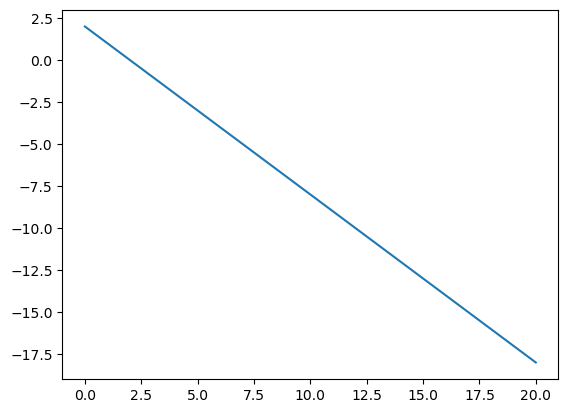

In [5]:
plt.plot(X, y)

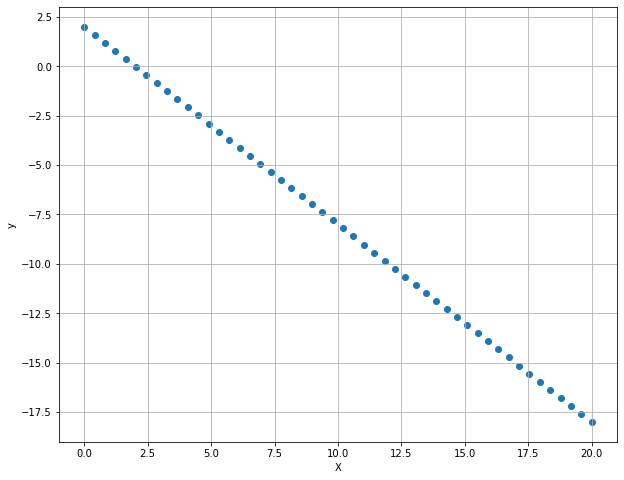

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Choose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)

In [15]:

def gd_singular(X, y, alpha, itr):
    
    th0 = 0
    th1 = 0
    loss = []
    thetas_0 = []
    thetas_1 = []
    itrs = []
    threshold = 0.1
    
    for i in range(itr):
    
        itrs.append(i)

        h = th0 + th1*X
        e = (h - y)
        j = 1/(2*len(X))*(e@e).sum()

        loss.append(j)
        thetas_0.append(th0)
        thetas_1.append(th1)

        #grdient
        j_theta_0 = 1/(len(X))*(e.sum())
        j_theta_1 = 1/(len(X))*(e@X).sum()

        gradient_vec = np.array([[j_theta_0],[j_theta_1]])
        norm = np.linalg.norm(gradient_vec)

        if (norm < threshold):
            break

        else:
            th0 = th0 - alpha*j_theta_0
            th1 = th1 - alpha*j_theta_1
            
    print("******* Training Report *********\n")
    print(f'Gradient Descent converged after {i+1} iterations\n')
    print('Cost=',j,'\n')
    print('Gradient Vector',gradient_vec,'\n')
    print('Gradient Vector Norm:',norm,'\n')
    print(f'Optimal theta_0: {th0}\noptimal theta_1: {th1}')        
        
    return th0, th1, h, thetas_0, thetas_1, loss

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [17]:
th0, th1,h,thetas_0,thetas_1,loss = gd_singular(X, y, alpha=0.0005, itr=300)

******* Training Report *********

Gradient Descent converged after 300 iterations

Cost= 0.507691020775994 

Gradient Vector [[-0.50859629]
 [ 0.03783146]] 

Gradient Vector Norm: 0.5100013766110167 

Optimal theta_0: 0.014799639219959363
optimal theta_1: -0.8523330787002148


In [18]:
y_pred = th0 + th1*X
print("r2 score = ", r2_score(y, y_pred))

r2 score =  0.9707406024215084


r2_score: 0.9686158031920962


##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

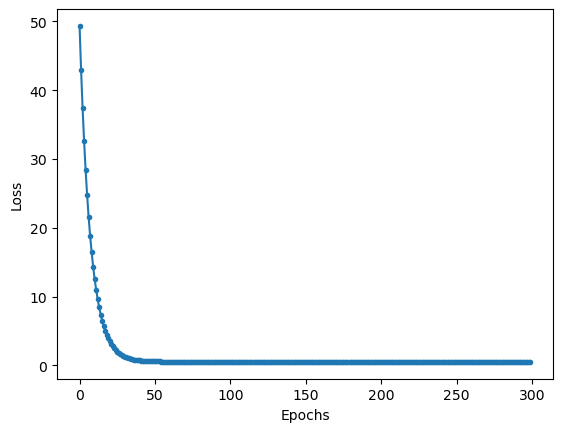

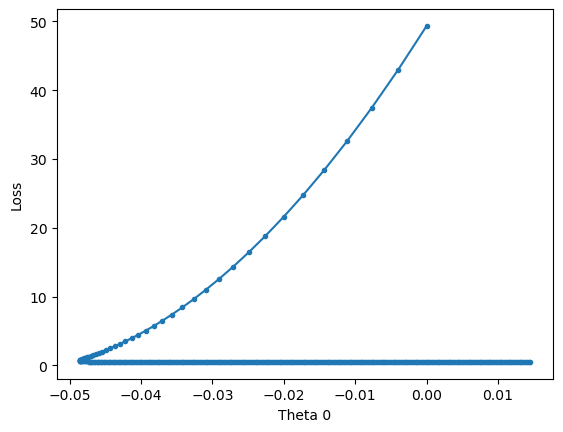

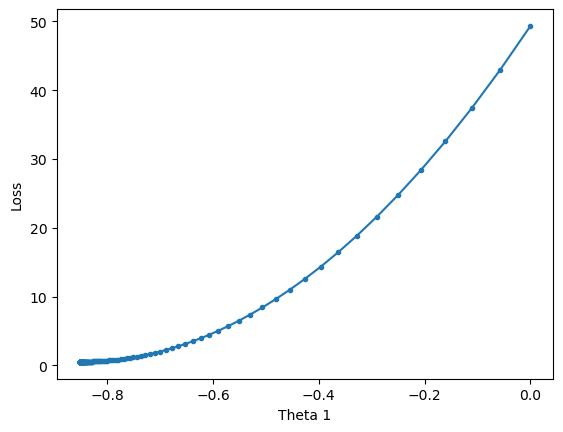

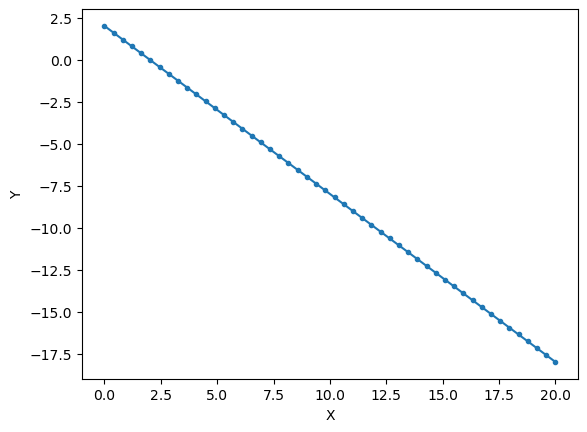

In [19]:
plotting(loss, thetas_0, thetas_1, X, y)

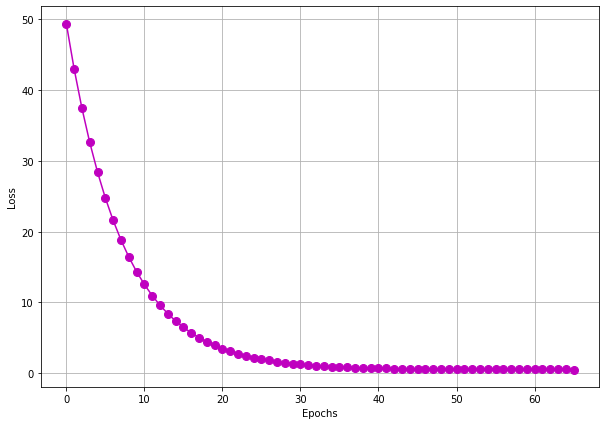

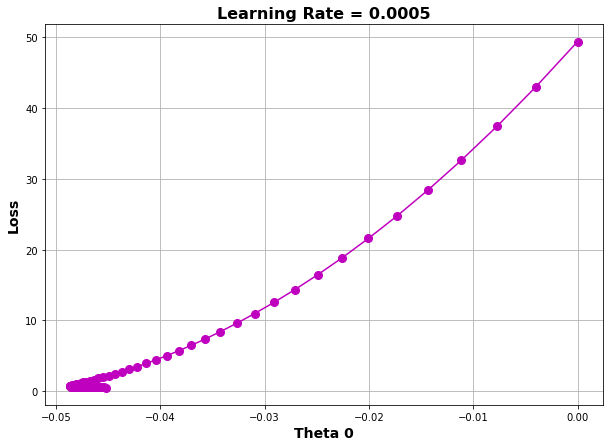

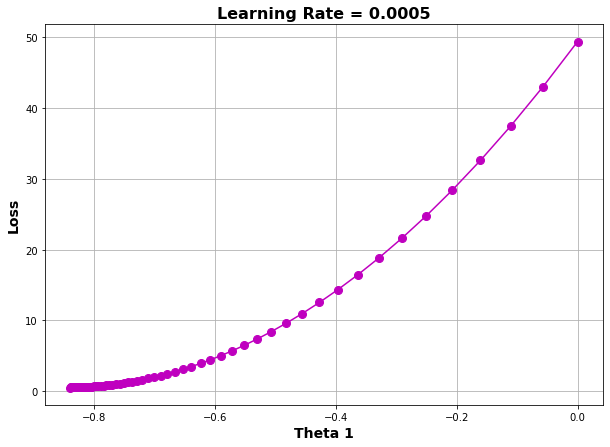

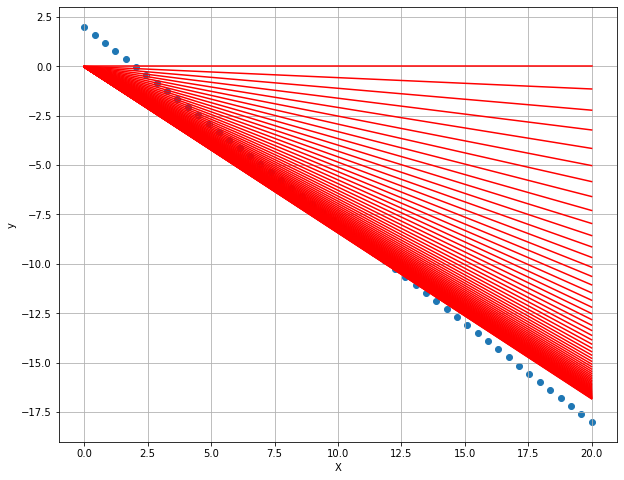

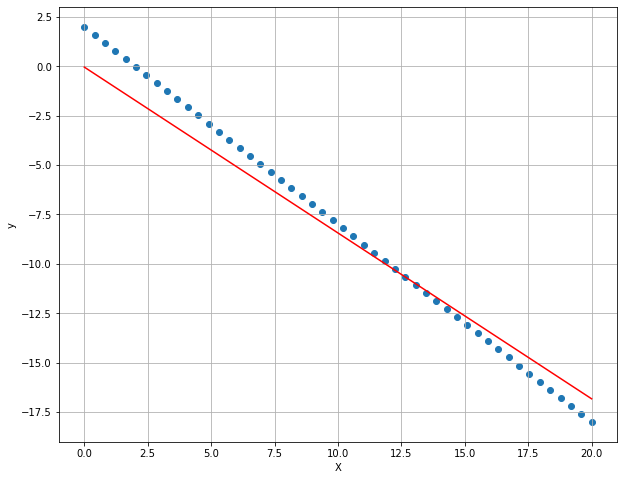

### Update your Batch GD for single variable  implementation (Batch variant) to be Momentum-Based GD and check your results

#### γ takes values between 0 and 1.

In [71]:

def momentum(X, y, alpha, itr, gamma):
    
    th0 = th1 = v0 = v1 =0
    loss = []
    thetas_0 = []
    thetas_1 = []
    itrs = []
    threshold = 0.1
    
    
    for i in range(itr):
        
        h = th0 + th1*X
        e = (h - y)
        j = 1/(2*len(X))*(e@e)
        
        loss.append(j)
        thetas_0.append(th0)
        thetas_1.append(th1)

        #grdient
        j_theta_0 = 1/(len(X))*(e.sum())
        j_theta_1 = 1/(len(X))*(e@X)

        gradient_vec = np.array([[j_theta_0],[j_theta_1]])
        norm = np.linalg.norm(gradient_vec)

        if (i > 0) and (abs(loss[-1] - loss[-2]) < 0.001 or norm < threshold):
            break

        else:
            v0 = gamma*v0 + alpha*j_theta_0
            th0 = th0 - v0

            v1 = gamma*v1 + alpha*j_theta_1
            th1 = th1 - v1
        
    return th0, th1, h, thetas_0, thetas_1, loss
            

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005, gamma=0.5 and max. iterations = 300.

In [37]:
th0, th1, h, thetas_0, thetas_1, loss = momentum(X, y, alpha=0.0005, itr=300, gamma=0.5)

In [15]:
from sklearn.metrics import r2_score

In [16]:
y_pred= th0 + th1*X
r2_score(y,y_pred)

0.972892479332971

r2_score: 0.9687892837396442


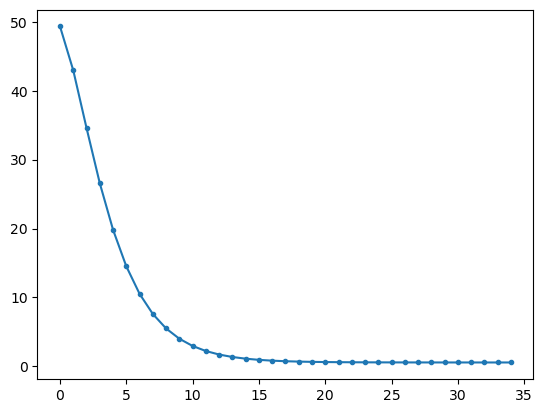

In [19]:
plt.plot(loss[:35], '.-')

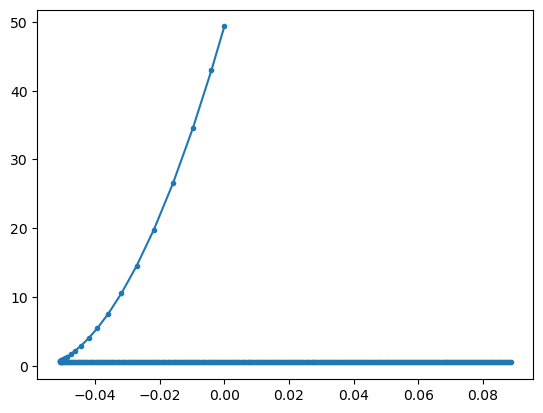

In [48]:
plt.plot(thetas_0, loss, '.-')

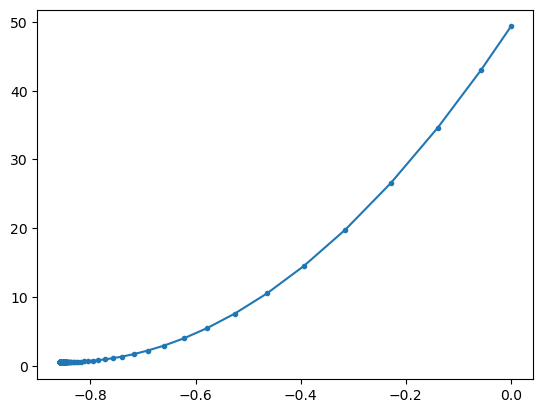

In [43]:
plt.plot(thetas_1, loss, '.-')

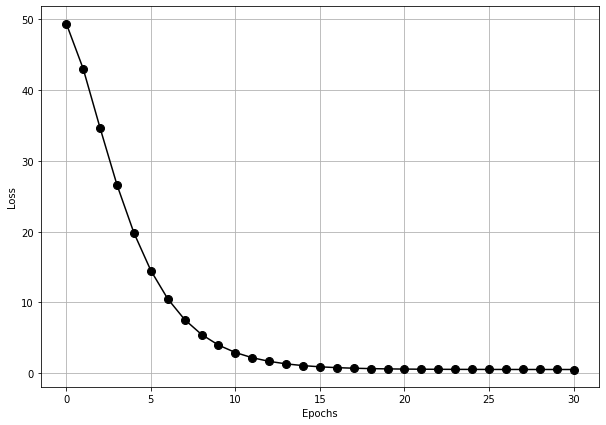

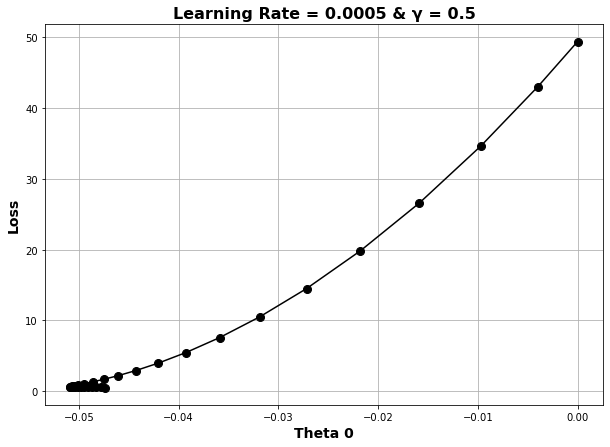

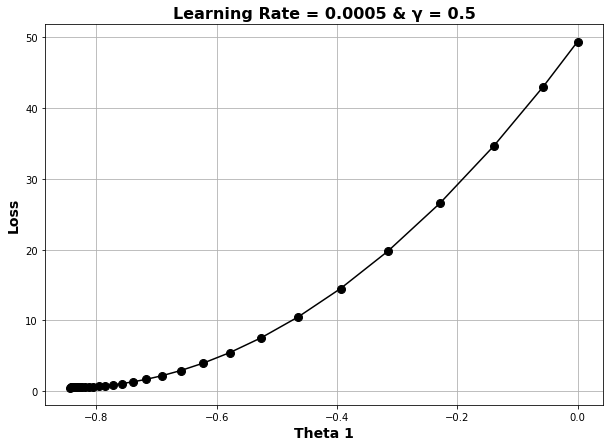

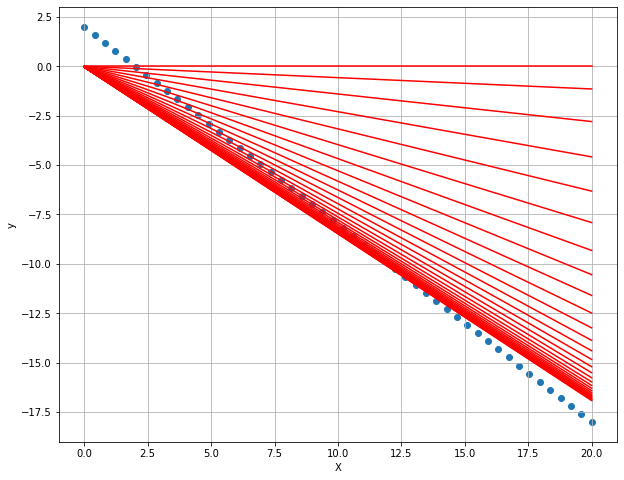

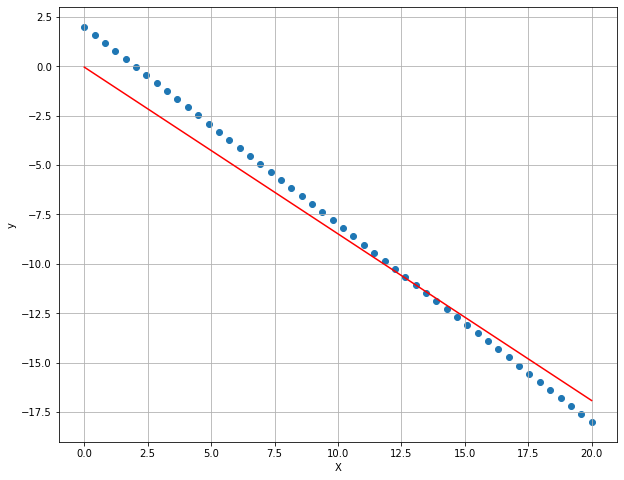

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [49]:
th0, th1, h, thetas_0, thetas_1, loss = momentum(X, y, alpha=0.0005, itr=300, gamma=0.9)

In [50]:
y_pred= th0 + th1*X
r2_score(y,y_pred)

0.9851382538862453

r2_score 0.973589591111118


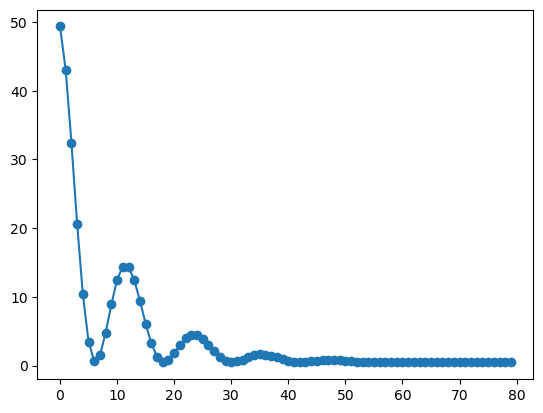

In [53]:
plt.plot(loss[:80], 'o-')

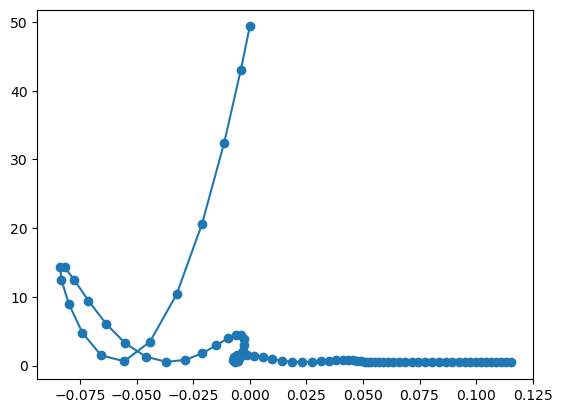

In [58]:
plt.plot(thetas_0[:80], loss[:80], 'o-')

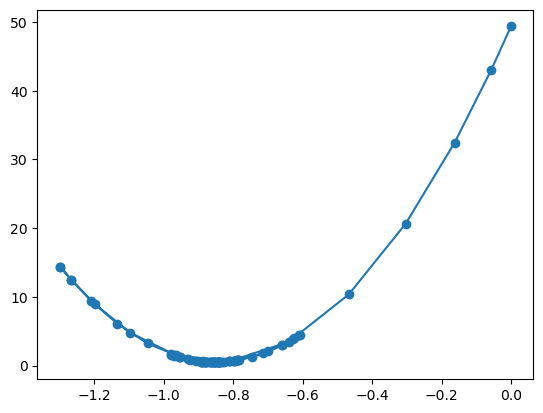

In [59]:
plt.plot(thetas_1[:80], loss[:80], 'o-')

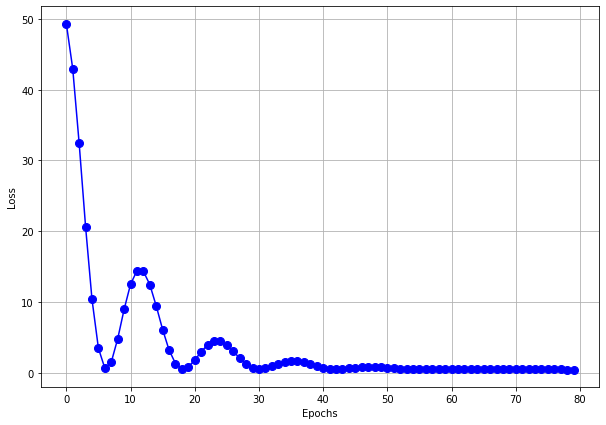

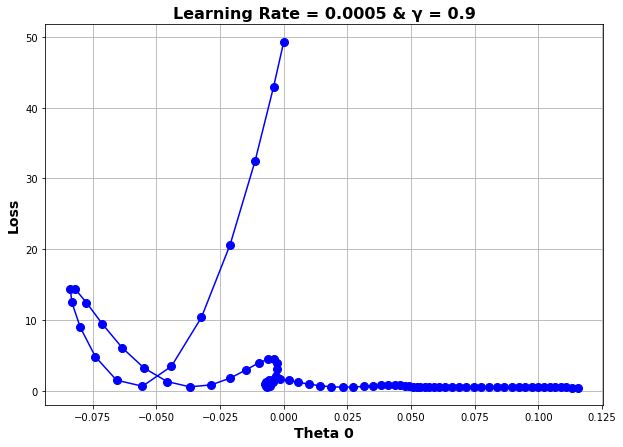

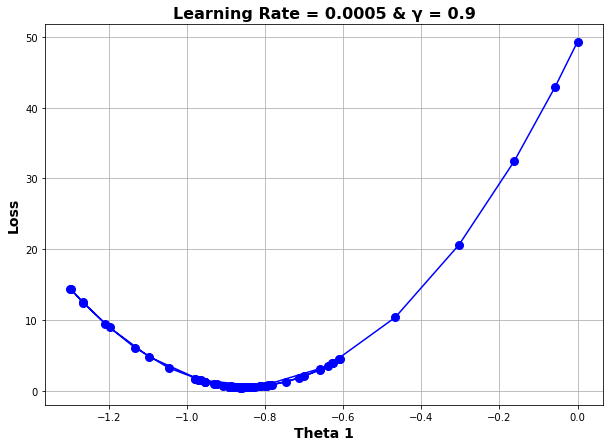

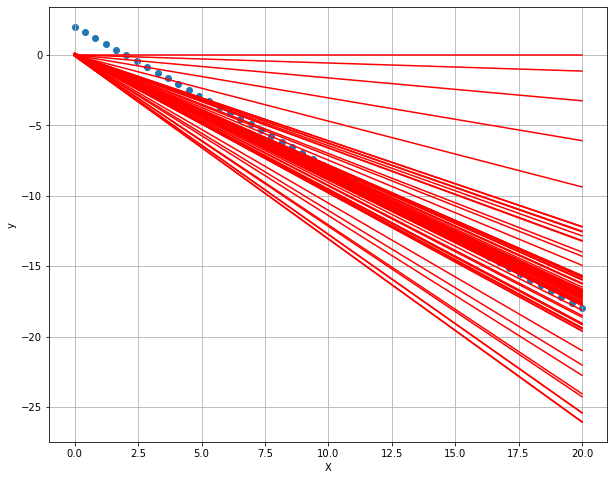

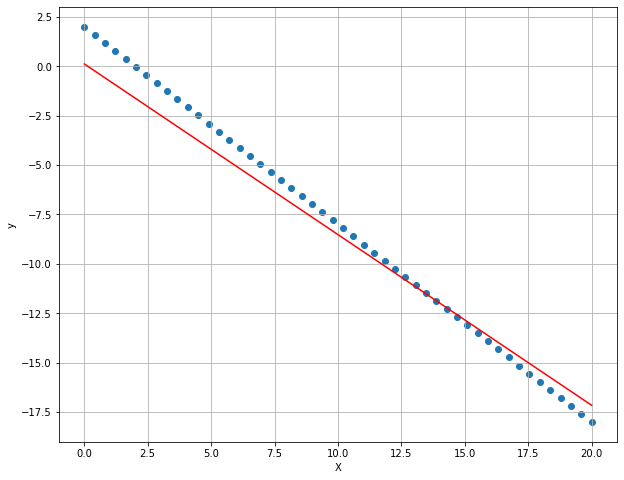

In [18]:
#guide answer

##### The following results uses alpha = 0.0005, gamma=0 and max. iterations = 300.

In [60]:
th0, th1, h, thetas_0, thetas_1, loss = momentum(X, y, alpha=0.0005, itr=300, gamma=0)

In [61]:
y_pred= th0 + th1*X
r2_score(y,y_pred)

0.9707406024215084

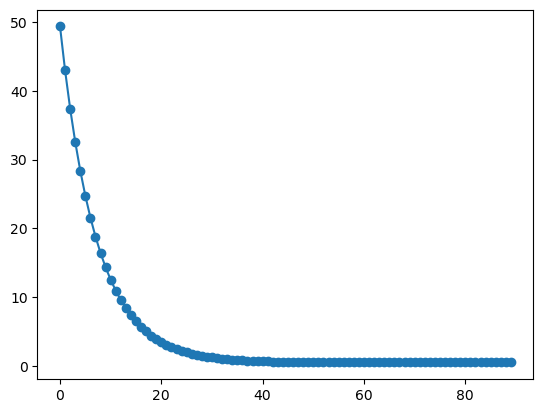

In [63]:
plt.plot(loss[:90], 'o-')

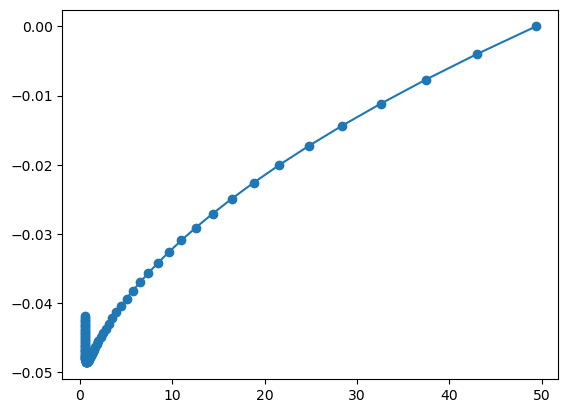

In [65]:
plt.plot(loss[:80], thetas_0[:80], 'o-')

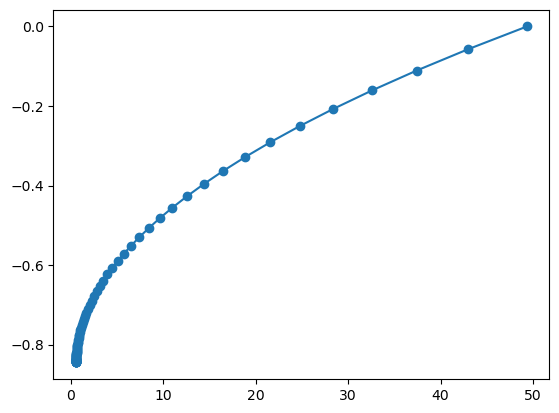

In [66]:
plt.plot(loss[:80], thetas_1[:80], 'o-')

### Do not forget:

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

### Update your Batch GD for one variable  implementation to be NAG and check your results

##### Very Important:
- <b><font color='red'> In order to calculate the gradient at theta_temp, you will need to calculate the prediction (hypothesis output) using theta_temp. </font></b> 
##### h_temp = theta0_temp + theta1_temp * X 

In [86]:

def nag(X, y, alpha, itr, gamma):
    
    th0 = th1 = v0 = v1 =0
    theta0_tmp = theta1_tmp = 0
    loss = []
    thetas_0 = []
    thetas_1 = []
    threshold = 0.1
    
    for i in range(itr):
        
        theta0_tmp = th0 - gamma*v0
        theta1_tmp = th1 - gamma*v1
        
        h_tmp = theta0_tmp + theta1_tmp*X
        e = (h_tmp - y)
        j = 1/(2*len(X))*(e@e)
        
        loss.append(j)
        thetas_0.append(th0)
        thetas_1.append(th1)

        #grdient
        j_theta_0 = 1/(len(X))*(e.sum())
        j_theta_1 = 1/(len(X))*(e@X)
        
        #gradient vector and L2 norm
        gradient_vec = np.array([[j_theta_0],[j_theta_1]])
        norm = np.linalg.norm(gradient_vec)

        if (i > 0) and (abs(loss[-1] - loss[-2]) < 0.001 or norm < threshold):
            break

        else:
            th0 = theta0_tmp - alpha*j_theta_0
            vt = gamma*v0 + alpha*j_theta_0

            th1 = theta1_tmp - alpha*j_theta_1
            vt = gamma*v1 + alpha*j_theta_1
        
    return th0, th1, h_tmp, thetas_0, thetas_1, loss, v0, v1
            

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [87]:
th0, th1, h_tmp, thetas_0, thetas_1, loss, v0, v1 = nag(X, y, alpha=0.0005, gamma=0.9, itr=300)

In [88]:
y_pred= th0 + th1*X
r2_score(y, y_pred)

0.9686158031920962

r2_score 0.971103130756324


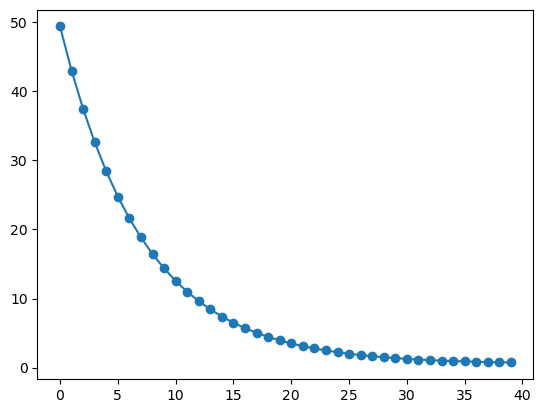

In [90]:
plt.plot(loss[:40], 'o-')

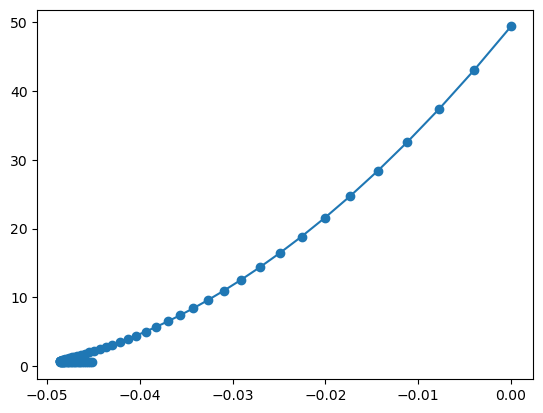

In [92]:
plt.plot(thetas_0, loss, 'o-')

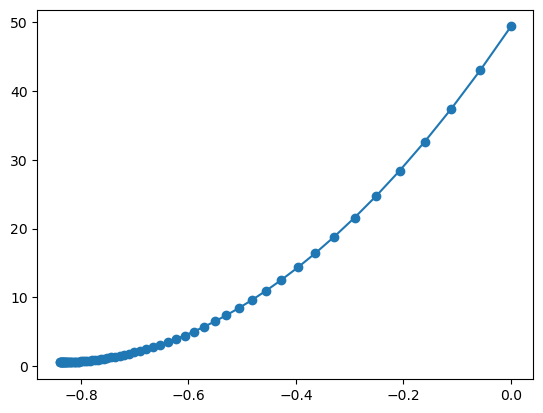

In [94]:
plt.plot(thetas_1, loss, 'o-')

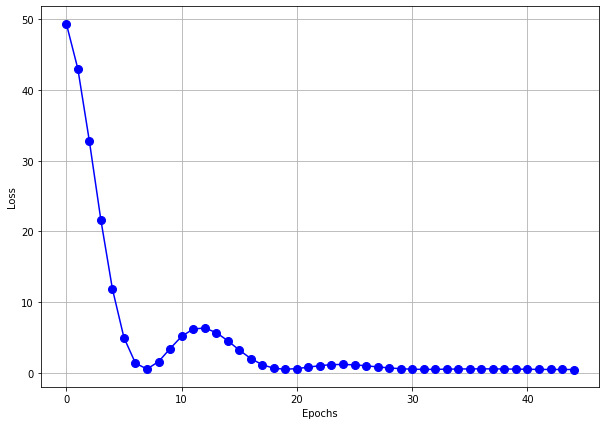

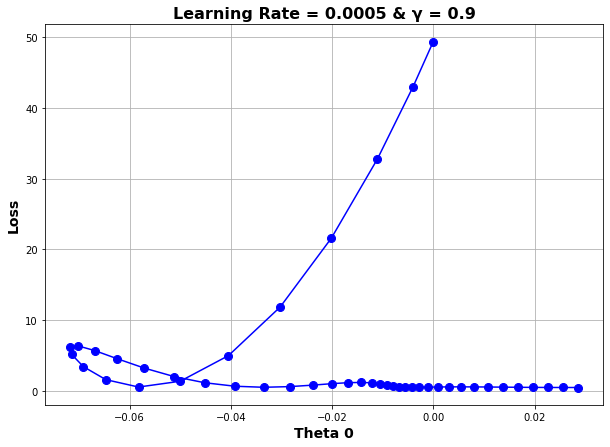

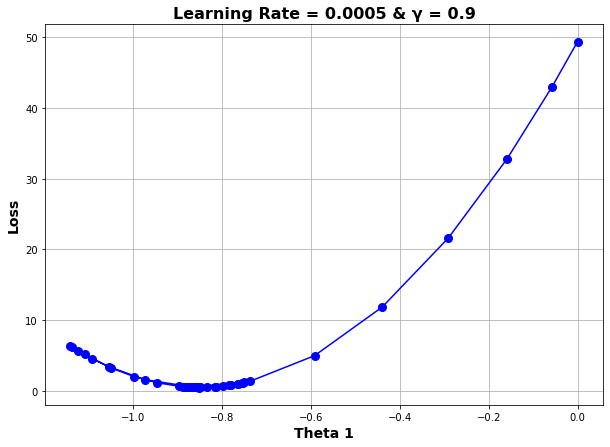

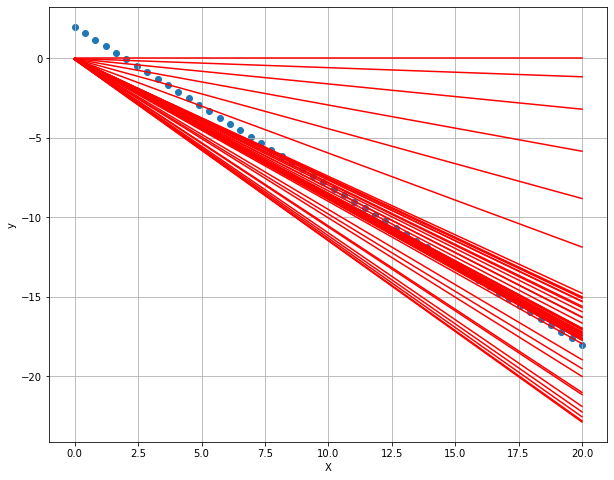

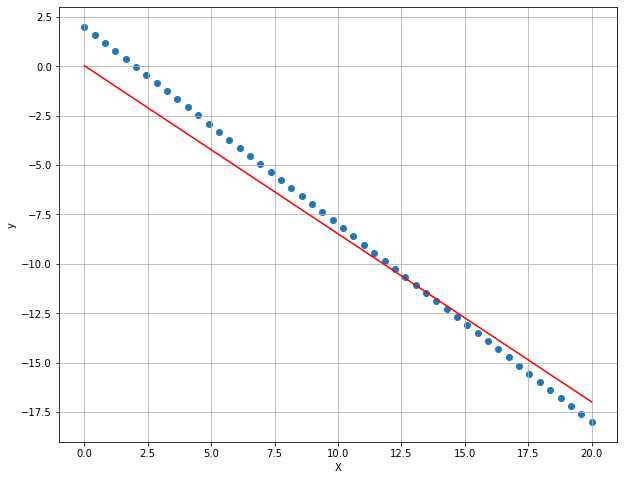

In [24]:
#guide answer

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

r2 score =  0.9699718983158406


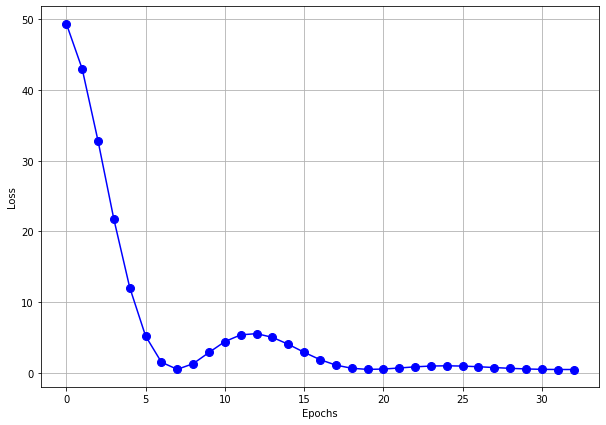

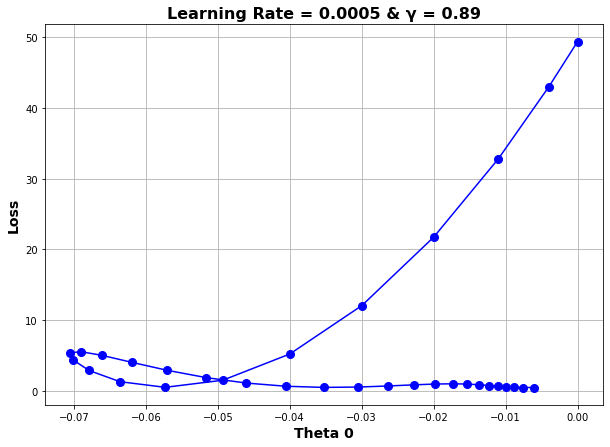

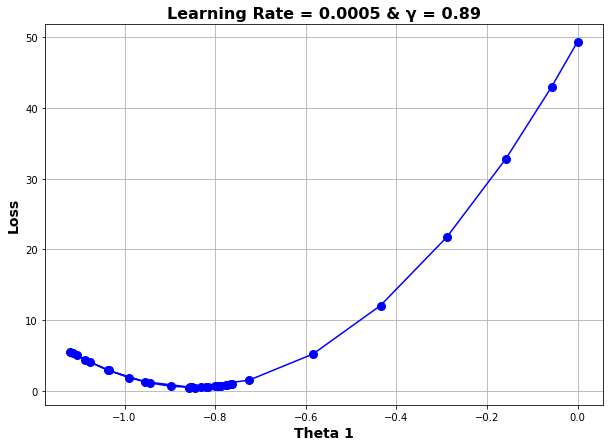

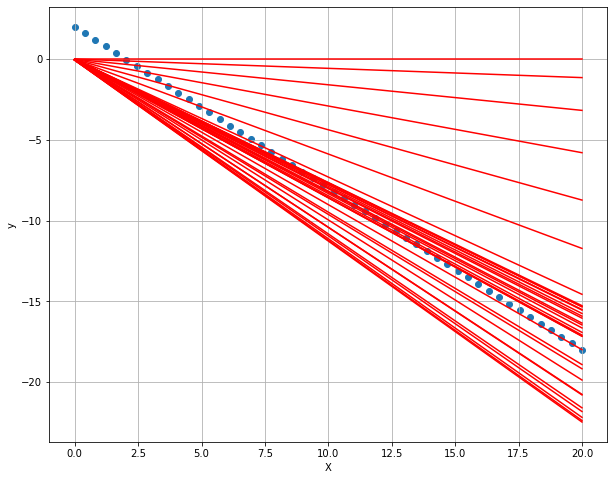

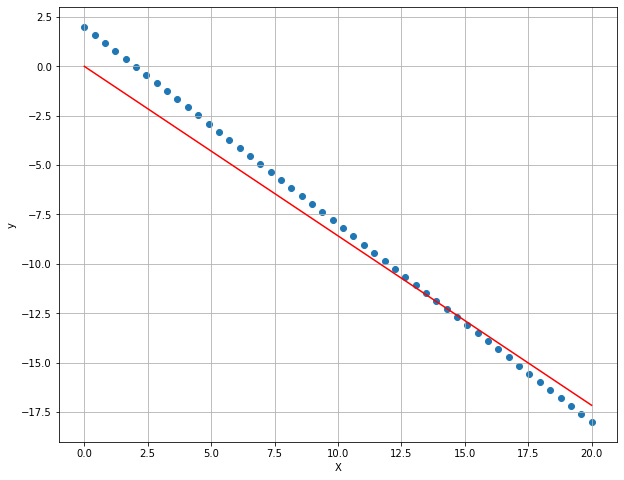